<a href="https://colab.research.google.com/github/Dharaniaids/Predictive-Modeling-with-Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : DHARANI S


Task 2 : Predictive Modeling with
Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car=pd.read_csv('/content/Dataset05-Car_Price_Dataset.csv')
car.head()

,Unnamed: 0,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,city mpg,Popularity,MSRP
0,479,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,480,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,481,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,482,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,483,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


In [ ]:
car.shape

(2112, 11)

In [ ]:
car.dtypes

,0
Unnamed: 0,int64
Make,object
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Vehicle Size,object
city mpg,int64
Popularity,int64


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2112 non-null   int64  
 1   Make               2112 non-null   object 
 2   Engine Fuel Type   2112 non-null   object 
 3   Engine HP          2097 non-null   float64
 4   Engine Cylinders   2107 non-null   float64
 5   Transmission Type  2112 non-null   object 
 6   Driven_Wheels      2112 non-null   object 
 7   Vehicle Size       2112 non-null   object 
 8   city mpg           2112 non-null   int64  
 9   Popularity         2112 non-null   int64  
 10  MSRP               2112 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 181.6+ KB


In [ ]:
car = car.drop(['Unnamed: 0'], axis = 1)

In [ ]:
car1 = car.rename(columns ={'Engine Fuel Type':'Fuel_Type','Engine HP' : 'Power_HP','Engine Cylinders' : 'No_of_Cylinders','Trasmission Type' : 'Transmission','Vehicle Size':'Vehicle_size','city mpg':'Mileage_mpg'})
car1.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission Type,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MSRP
0,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


In [ ]:
car1.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission Type',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

**DUPLICATE RECORDS**

In [ ]:
car1[car1.duplicated(subset = ['Make','Fuel_Type','Power_HP','No_of_Cylinders','Transmission Type','Driven_Wheels','Vehicle_size','Mileage_mpg','Popularity'],keep='first')]

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission Type,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MSRP
1,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
3,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725
5,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,43400
6,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,32820
...,...,...,...,...,...,...,...,...,...,...
2107,Toyota,regular unleaded,106.0,4.0,MANUAL,front wheel drive,Compact,30,2031,15250
2108,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,16375
2109,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,17285
2110,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,18000


**DELETE THE DUPLICATE RECORDS**

In [ ]:
car2 = car1.drop_duplicates(subset =['Make' , 'Fuel_Type','Power_HP','No_of_Cylinders','Transmission Type','Driven_Wheels','Vehicle_size','Mileage_mpg','Popularity'],keep='first')

In [ ]:
car2.shape

(406, 10)

**MISSING VALUES**

In [ ]:
car2.isnull().sum()

,0
Make,0
Fuel_Type,0
Power_HP,5
No_of_Cylinders,2
Transmission Type,0
Driven_Wheels,0
Vehicle_size,0
Mileage_mpg,0
Popularity,0
MSRP,0


**MISSING VALUE IMPUTATION**

In [ ]:
power_mean = car2['Power_HP'].mean()
power_mean

214.00498753117208

In [ ]:
cylinder_mode = car2['No_of_Cylinders'].mode()
cylinder_mode[0]

4.0

In [ ]:
car2['Power_HP'] = car2['Power_HP'].fillna(power_mean)
car2['No_of_Cylinders'] = car2['No_of_Cylinders'].fillna(cylinder_mode[0])

<ipython-input-38-074af6c1b417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2['Power_HP'] = car2['Power_HP'].fillna(power_mean)
<ipython-input-38-074af6c1b417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2['No_of_Cylinders'] = car2['No_of_Cylinders'].fillna(cylinder_mode[0])


In [ ]:
car2.isnull().sum()

,0
Make,0
Fuel_Type,0
Power_HP,0
No_of_Cylinders,0
Transmission Type,0
Driven_Wheels,0
Vehicle_size,0
Mileage_mpg,0
Popularity,0
MSRP,0


**Exploratory Data Analysis[EDA]**

In [ ]:
car2.describe()

,Power_HP,No_of_Cylinders,Mileage_mpg,Popularity,MSRP
count,406.000000,406.000000,406.000000,406.000000,406.000000
mean,214.004988,5.295567,20.928571,3377.679803,25534.371921
std,84.009523,1.548023,10.734843,2121.244431,17135.324044
min,63.000000,0.000000,11.000000,873.000000,2000.000000
25%,154.250000,4.000000,15.000000,873.000000,18148.750000
50%,200.000000,5.000000,19.000000,2031.000000,25895.000000
75%,266.000000,6.000000,23.000000,5657.000000,32250.000000
max,662.000000,12.000000,126.000000,5657.000000,149995.000000


In [ ]:
car2.Make.value_counts()

,count
Make,
Ford,184
Toyota,118
Volkswagen,104


<Axes: xlabel='Make'>

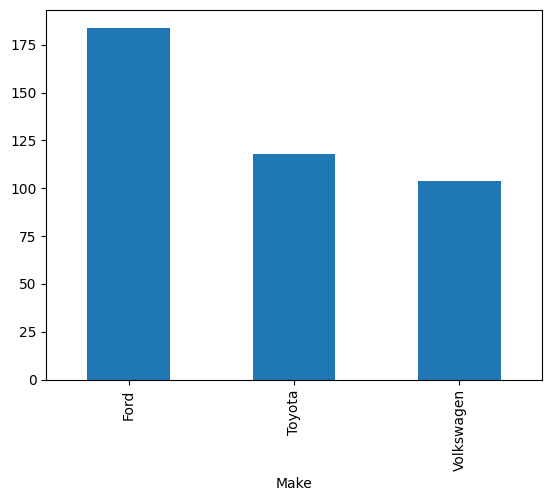

In [ ]:
car2.Make.value_counts().plot(kind='bar')

In [ ]:
car2.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission Type',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

<Axes: xlabel='Fuel_Type'>

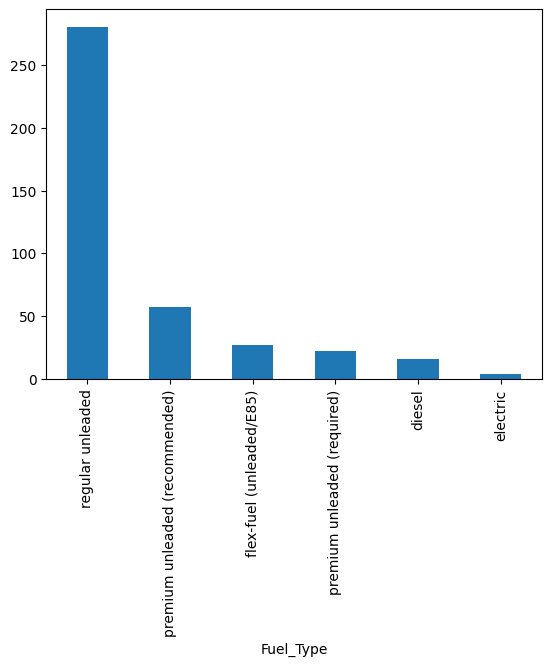

In [ ]:
car2.Fuel_Type.value_counts().plot(kind ='bar')

In [ ]:
car2=car2.rename(columns={'Transmission Type':'Transmission'})

In [ ]:
car2.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

<Axes: xlabel='Transmission'>

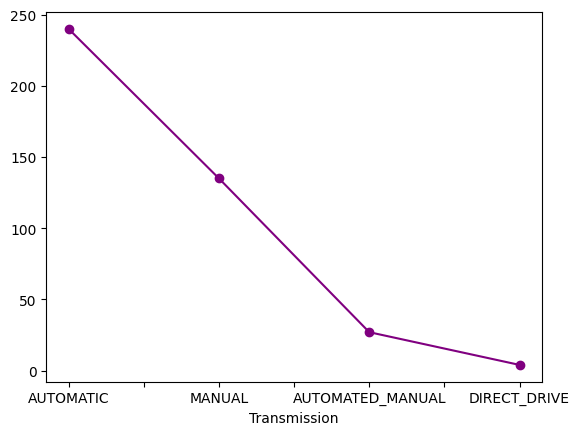

In [ ]:
car2.Transmission.value_counts().plot(kind='line', marker='o', color='purple')

<Axes: ylabel='Vehicle_size'>

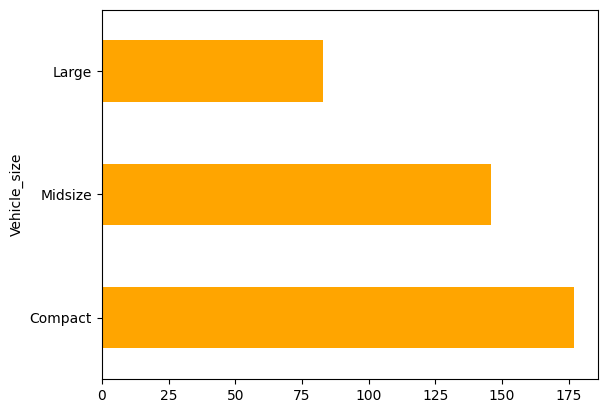

In [ ]:
car2.Vehicle_size.value_counts().plot(kind ='barh',color='orange')

<Axes: xlabel='Driven_Wheels'>

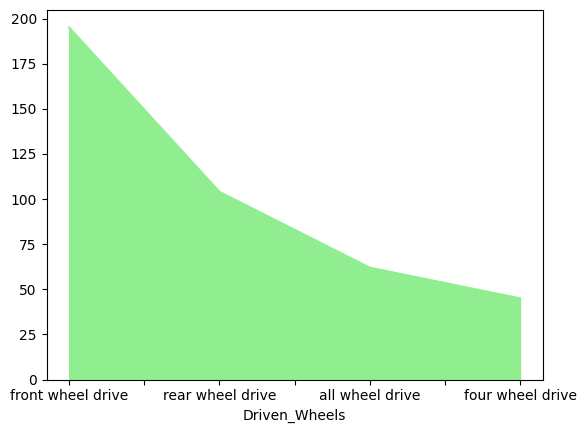

In [ ]:
car2.Driven_Wheels.value_counts().plot(kind='area', color='lightgreen')

<Axes: ylabel='Frequency'>

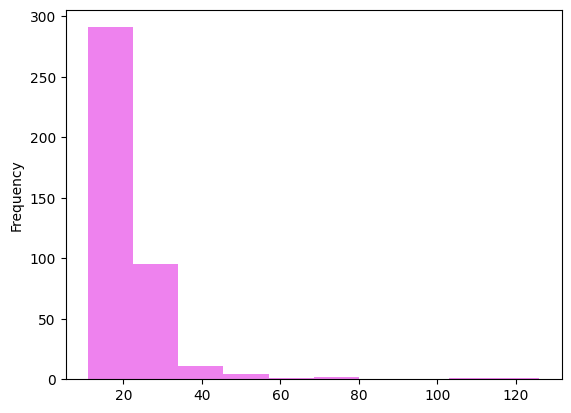

In [ ]:
car2['Mileage_mpg'].plot(kind ='hist',color='violet')

<Axes: ylabel='Frequency'>

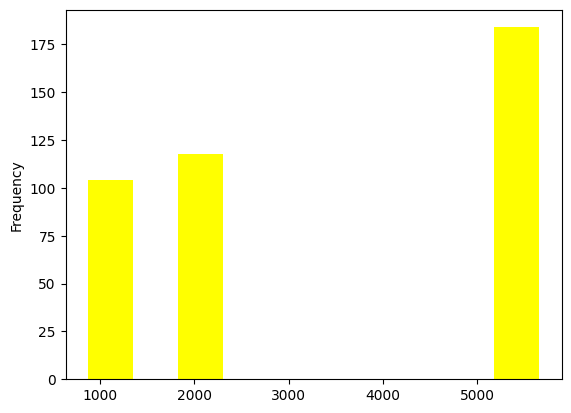

In [ ]:
car2['Popularity'].plot(kind='hist',color='yellow')

<Axes: ylabel='Frequency'>

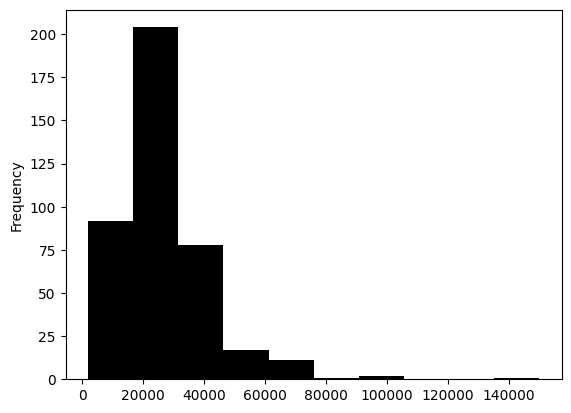

In [ ]:
car2['MSRP'].plot(kind='hist',color='black')

**MACHINE LEARNING**

In [ ]:
car2.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le =LabelEncoder()

In [ ]:
car2['Make'] = Le.fit_transform(car2['Make'])
car2['Fuel_Type'] = Le.fit_transform(car2['Fuel_Type'])
car2['Transmission'] = Le.fit_transform(car2['Transmission'])
car2['Driven_Wheels'] = Le.fit_transform(car2['Driven_Wheels'])
car2['Vehicle_size'] = Le.fit_transform(car2['Vehicle_size'])

In [ ]:
car2.head(10)

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MSRP,MaKe
0,1,5,270.0,6.0,1,3,2,17,2031,41365,1
2,1,5,270.0,6.0,1,1,2,17,2031,37615,1
26,1,3,205.0,4.0,3,3,0,21,2031,26255,1
27,1,3,200.0,4.0,1,3,0,24,2031,26975,1
28,0,5,135.0,6.0,1,3,2,16,5657,2000,0
29,0,5,135.0,6.0,1,3,2,15,5657,2000,0
30,0,5,155.0,6.0,1,0,1,14,5657,2000,0
31,0,5,135.0,6.0,1,3,1,15,5657,2000,0
32,0,5,140.0,6.0,1,3,2,15,5657,2000,0
33,0,5,155.0,6.0,1,0,1,13,5657,2000,0


**DEPENDENT AND INDEPENDENT VARIABLE**

In [ ]:
x = car2.drop(['MSRP'], axis = 1)
y = car2['MSRP']

In [ ]:
x.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MaKe
0,1,5,270.0,6.0,1,3,2,17,2031,1
2,1,5,270.0,6.0,1,1,2,17,2031,1
26,1,3,205.0,4.0,3,3,0,21,2031,1
27,1,3,200.0,4.0,1,3,0,24,2031,1
28,0,5,135.0,6.0,1,3,2,16,5657,0


In [ ]:
y.head()

,MSRP
0,41365
2,37615
26,26255
27,26975
28,2000


**SCALLING**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
x['Power_HP'] = ss.fit_transform(x[['Power_HP']])
x['No_of_Cylinders'] = ss.fit_transform(x[['No_of_Cylinders']])
x['Mileage_mpg'] = ss.fit_transform(x[['Mileage_mpg']])
x['Popularity'] = ss.fit_transform(x[['Popularity']])

In [ ]:
x.head()


,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MaKe
0,1,5,0.667354,0.455615,1,3,2,-0.366416,-0.635637,1
2,1,5,0.667354,0.455615,1,1,2,-0.366416,-0.635637,1
26,1,3,-0.107322,-0.837949,3,3,0,0.006662,-0.635637,1
27,1,3,-0.166913,-0.837949,1,3,0,0.286471,-0.635637,1
28,0,5,-0.941589,0.455615,1,3,2,-0.459686,1.075846,0


**TRAINING AND TESTING DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

**MODEL DEVELOPMENT**

In [ ]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()

**MODEL TRAIN**

In [ ]:
LinearReg.fit(x_train,y_train)

LinearRegression()

**Model Predictions**

In [ ]:
y_pred = LinearReg.predict(x_test)
y_pred

array([17696.34293378, 47898.92991269, 27279.77160584, 12110.02605603,
       14736.33634455, 17069.60239433,  9895.12510163, 43413.91124172,
       50707.73151681, 49430.00706852,  6051.62765212, 20055.78042648,
       10704.70527485, 30160.68791054, 47906.93903504, 50318.82692658,
       29004.35387017, 22634.63440392, 13201.45778472, 26037.77993495,
       46577.04640761, 25719.04813155,  8523.47215759, 23862.23849103,
       59319.01440115, 40856.05573194, 13885.16769577, 24455.38185498,
       22831.47978831, 30909.66685326, 10203.76372788, 23205.65871815,
       31062.04822529, 23858.90425632, 10970.40091317, 27786.88155043,
       17861.03301187, 44165.34743808,  3339.44530823, 47440.01179142,
       24722.90179336, 21465.07645767, 49819.90400694,  6355.08891651,
       37386.54292689, 16975.387007  , 25899.3359846 , 26399.1457536 ,
       18834.75872636, 17709.50335027, 21501.96099789, 22017.35715142,
       25410.27611937, 25652.61591573, 50597.61403965, 20540.12919389,
      

**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(y_test,y_pred)

0.6725063381709799

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

100846023.63454318

In [ ]:
RMSE =(mse)**0.5
RMSE

10042.212088705515

**COEFFICIENTS**

In [ ]:
LinearReg.coef_

array([ 1110.1878106 , -1052.53408275, 14675.62688213, -2195.20599726,
       -2411.69896953, -2152.6798441 , -1037.63996281,  3309.10449358,
       -1044.23995283,  1110.1878106 ])

**Intercept**

In [ ]:
LinearReg.intercept_

36804.442036499284